In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.multioutput import MultiOutputRegressor as mor
import time

In [68]:
#Recolhendo dados do facebook e preparando dataset

import pandas_datareader.data as web
import datetime as dt

end = dt.datetime(2020, 6, 1)
start = dt.datetime(2019, 1, 1)

df = web.DataReader("FB", 'yahoo', start, end)

df = df.reset_index()
df = df.drop(columns=['Open','Date','High','Low','Volume','Adj Close'])
df = df.rename(columns={'Close': 'Close 0'})

def window (df, w):
    for i in range(1,w):
        df['Close '+str(i)] = df['Close '+str(i-1)].shift(1)
    return df
        
df = window(df,7)
df = df.rename(columns={'Close 0': '+3',
                       'Close 1': '+2',
                       'Close 2': '+1',
                       'Close 3': 'Today',
                       'Close 4': '-1',
                       'Close 5': '-2',
                       'Close 6': '-3'})
df.dropna(inplace=True)
df.head()

,+3,+2,+1,Today,-1,-2,-3
6,144.199997,144.229996,142.529999,138.050003,137.949997,131.740005,135.679993
7,143.800003,144.199997,144.229996,142.529999,138.050003,137.949997,131.740005
8,145.389999,143.800003,144.199997,144.229996,142.529999,138.050003,137.949997
9,148.949997,145.389999,143.800003,144.199997,144.229996,142.529999,138.050003
10,147.539993,148.949997,145.389999,143.800003,144.199997,144.229996,142.529999


In [69]:
#Separando dados de treino e teste
X = df.loc[:, ['Today','-1', '-2', '-3']]
y = df.loc[:, ['+1', '+2', '+3']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [70]:
svm_hp = {'estimator__kernel':['rbf','linear'], 'estimator__C':(np.arange(1,10)/10).tolist(), 
          'estimator__epsilon':(np.arange(1,100)/100).tolist()}

In [72]:
svr = SVR()
gs = GridSearchCV(mor(svr), param_grid=svm_hp)

ini = time.time()
gs.fit(X,y)
fim = time.time()
tot = fim - ini

In [74]:
gs.best_params_

{'estimator__C': 0.9,
 'estimator__epsilon': 0.99,
 'estimator__kernel': 'linear'}

In [75]:
model_tuned = mor(SVR())

In [62]:
model_tuned.fit(X_train, y_train)

MultiOutputRegressor(estimator=SVR())

In [76]:
gs.score(X_test, y_test)

0.9509847790290928

In [78]:
p = gs.predict(X)

In [79]:
def get_result(j, predict):
    lst = []
    for i in range(len(predict)):
        lst.append(predict[i][j])
    return lst

Text(0.5, 1.0, '+1')

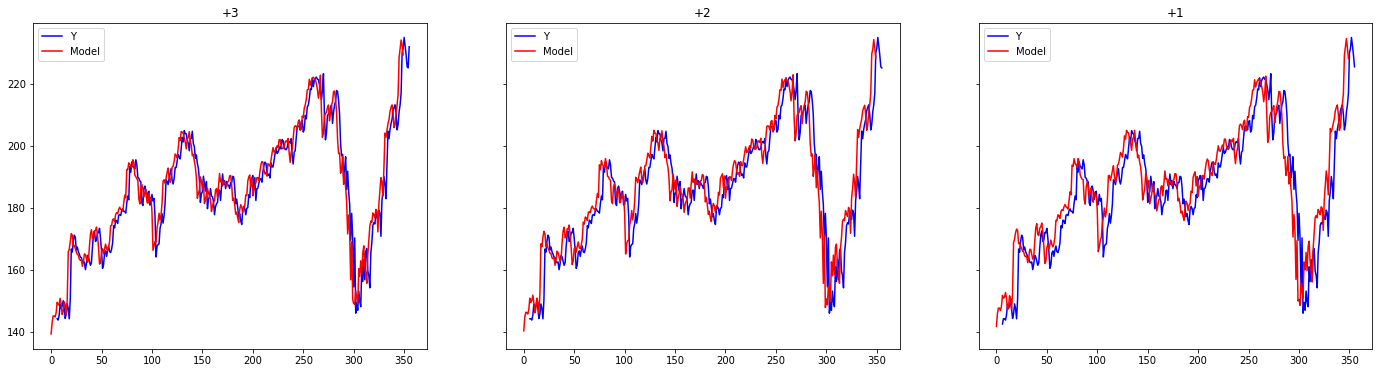

In [80]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, sharey = True, sharex = True,  figsize=(24,6))

ax[0].plot(y['+3'], color='blue', label='Y')
ax[0].plot(get_result(0,p), color='red', label='Model')
ax[0].legend()
ax[0].set_title("+3")

ax[1].plot(y['+2'], color='blue', label='Y')
ax[1].plot(get_result(1,p), color='red', label='Model')
ax[1].legend()
ax[1].set_title("+2")

ax[2].plot(y['+1'], color='blue', label='Y')
ax[2].plot(get_result(2,p), color='red', label='Model')
ax[2].legend()
ax[2].set_title("+1")

In [18]:
y['Target']

9        94.970001
10       95.260002
11       94.349998
12       94.160004
13       97.940002
           ...    
1105    232.199997
1106    229.139999
1107    225.460007
1108    225.089996
1109    231.910004
Name: Target, Length: 1101, dtype: float64

In [36]:
p.shape

(1101, 5)

In [44]:
p

array([[114.89722871, 114.39812832, 113.97955476, 113.6168318 ,
        112.97789393],
       [115.43174778, 114.92529126, 114.48170255, 114.10920017,
        113.47428535],
       [115.80543631, 115.33744205, 114.90239743, 114.5262789 ,
        113.87409172],
       ...,
       [197.65479307, 199.27111386, 199.26359867, 200.43871173,
        201.87990133],
       [193.99864274, 195.46345125, 195.4761216 , 196.50186568,
        198.13094397],
       [189.63457058, 190.91447836, 190.92926494, 191.78278963,
        193.48289472]])

In [42]:
a = []

for i in range (len(p)):
    a.append(p[i][0])

In [43]:
a

[114.89722870953048,
 115.43174777910048,
 115.80543631338634,
 116.65874642496604,
 116.64372136021211,
 116.9735815842723,
 117.30968169654588,
 118.07764756156331,
 118.28231886558939,
 118.45045057616159,
 118.1300503870998,
 117.80970804399993,
 117.71573585077044,
 116.9748818747031,
 117.0210483341964,
 117.09828996902718,
 116.86174614979154,
 115.30341621803994,
 115.12262232170255,
 114.65106244708724,
 114.39525758373512,
 114.38461166908115,
 114.46495939157255,
 114.62283989985052,
 114.80009081352527,
 114.59724557467342,
 114.29252956651133,
 114.07834890467097,
 113.9367361092492,
 113.86112012760651,
 113.57341998287848,
 113.59857432746935,
 113.56398104104605,
 113.51268074805861,
 113.47438188625787,
 113.6248888588846,
 113.747332930357,
 113.78000071024667,
 113.71770651717281,
 113.54931404503012,
 113.46748288590894,
 113.48616260985486,
 113.46730167673829,
 113.62557840077824,
 113.73912146745411,
 113.87093308671922,
 114.17944862517663,
 114.23917875020672,
